<a href="https://colab.research.google.com/github/JAEILJEON/JAEIL_ML_LAB/blob/main/MLLEC_1_%EB%AA%A8%EC%9D%8C_210704.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

##ML LAB 4
multi variable linear regression

In [ ]:
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

# slice data
X = data[:, :-1]
y = data[:, [-1]]

W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

learning_rate = 0.000001

# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b

print("epoch | cost")

n_epochs = 2000
for i in range(n_epochs+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - y)))

    # calculates the gradients of the loss
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # updates parameters (W and b)
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

In [ ]:
#내가 해본 것
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

# slice data
X_data = data[:,:-1]
Y_data = data[:,[-1]]   #여기 차원 처리해주는 게 좀 중요하네. 열 하나만 쓸 거면 딱 [-1] 이런 식으로 차원 지정해줘야겠다. 이거 안하면 shape이이상하게 돼서 broadcasting 됨.

W = tf.Variable(tf.random.normal([3,1])) # 안에 값은 랜덤 지정인데, 3행 1열 지정해준 건 x(입력)이 3열, y(출력)가 1열이라서, W는 3행 1열.
b = tf.Variable(tf.random.normal([1])) #b는 생략한 체로 많이 쓰긴 하지만 일단 있으니까 따라한다. #1버전에서 random_normal, 2버전에서는 random.normal()

learning_rate = 0.0000001 #이건 원래 이렇게 작은 값으로 지정해줌.

# hypothesis, prediction function
def predict(X): #가설함수 세우는 거. H(X) = XW. matmul이나, dot 쓴다
  return tf.matmul(X_data,W) + b

n_epochs = 2000    #이건 반복횟수 정해주는 거~
for i in range(n_epochs+1):    
  # tf.GradientTape() to record the gradient of the cost function. 여기서부터 경사하강법 사용함. 
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean((tf.square(predict(X_data) - Y_data))) # 한번 더 묶어서 reduce_mean() 안에 들어가는 거.

  # calculates the gradients of the loss
  W_grad, b_grad = tape.gradient(cost, [W, b])
  # updates parameters (W and b)
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0: #100단위로 끊어서 출력해달라는 거임.
    print("{:5} | {:10.4f}".format(i, cost.numpy()))

    0 | 11961.0361
  100 |  4951.3130
  200 |  2050.2385
  300 |   849.5856
  400 |   352.6771
  500 |   147.0248
  600 |    61.9108
  700 |    26.6852
  800 |    12.1068
  900 |     6.0730
 1000 |     3.5757
 1100 |     2.5423
 1200 |     2.1146
 1300 |     1.9375
 1400 |     1.8641
 1500 |     1.8337
 1600 |     1.8211
 1700 |     1.8158
 1800 |     1.8136
 1900 |     1.8126
 2000 |     1.8122


##ML LAB 05
logistic regression / classfication 텐서플로우로 구현하기

2.5.0


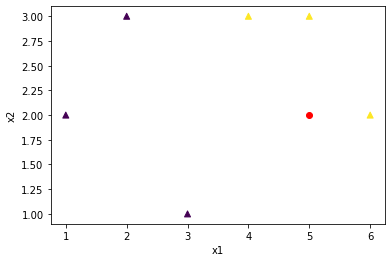

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)



x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train] #xtrain의 0번 위치 값들
x2 = [x[1] for x in x_train]  #xtrain의 1번 위치 값들

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

#0값은 보라, 1의 값은 노랑, 테스트 데이터는 빨간색

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)) # 각각의 슬라이스들이 1행2열과 1행1열의 6개 슬라이스로 만들어져서 dataset에 들어가짐.

W = tf.Variable(tf.zeros([2,1]), name = 'weight') #여기서 난 w를 2행 1열로 만들어줄 건데, 그 이유는, X가 2열이고, 결과값 Y가 1열이기 때문임. zeros한 이유는 그냥.. 어짜피 w 초기값은 아무거나 넣으니까.
b = tf.Variable(tf.zeros([1]), name = 'bias') #바이어스 값을 더할 거니까 그냥 이렇게.

def logistic_regression(features):  #가설함수인 logistic regression함수 만들 거임.
  hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(features, W)+b)) #시그모이드 함수 만들거임. matmul은 리니어에서 H(x) = WX 이거니까. 이거 행렬곱으로 했던 거 쓰는 거! z = H(x) = WX
  return hypothesis

def loss_fn(hypothesis, labels): #위에서 가설함수 정했으면, 비용함수도 정해주면 됨. 비용함수는 loss_fn이라는 이름으로! 뭐 손실함수와 같은듯. hypotesis는 가설(예측값), label은 y(실제값)
  cost = -tf.reduce_mean( labels * tf.math.log(hypothesis) + (1-labels) * tf.math.log(1 - hypothesis) )
  return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) #자동 최적화도구. 이거만 쓰면 굳이 경사하강법 알고리즘 구현 안해도 됨.

def accuracy_fn(hypothesis, labels): #여기서 정확도 함수 만들어줄건데, 0.5를 기준으로 넘으면 1, 안넘으면 0으로 캐스팅 해줄 거다.
  predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels),dtype=tf.int32)) #라벨값, y, 실제값은 0과 1로 되어있기 때문에, predicted에서 0과 1로 캐스팅 된 값과 비교. 비교해서 같으면 값을 올려준다. 근데 이걸 평균함수 쓰니까 알아서 올리고 나눠서 평균(정확도) 구해줌.
  return accuracy                                                              #한번 더 캐스팅하는 이유와, 정수형으로 바꿔주는 이유가 좀 궁금한데?

def grad(features, labels): #grad를 미분값을 반환하는 함수로 만들거임.
  with tf.GradientTape() as tape:
    hypothesis = logistic_regression(features)    #허허 여기 뭐지 대체..?
    loss_value = loss_fn(hypothesis, labels)
  return tape.gradient(loss_value, [W,b]) #실제 가설 함수를 통해 나온 값과, 손실함수를 통해 나온 비용의 미분값을 계산해서 반환하는 함수.

#학습시작
#여기서부터 아래까지는 뭐 그냥 설명을 안하고 넘어가네.
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset.batch(len(x_train))): #batch는 원래 몇개 불러올지 정하는 건데, 데이터가 6개뿐이라 그냥 다 불러왔음. iter는 반복을 끝낼 값을 지정하면 특정 값이 나올 때 반복을 끝냄.
        hypothesis = logistic_regression(features)
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(hypothesis,labels)))

  # Iter: 0, Loss: 0.6931
  # Iter: 100, Loss: 0.5781
  # Iter: 200, Loss: 0.5352
  # Iter: 300, Loss: 0.5056
  # Iter: 400, Loss: 0.4840
  # Iter: 500, Loss: 0.4673
  # Iter: 600, Loss: 0.4537
  # Iter: 700, Loss: 0.4421
  # Iter: 800, Loss: 0.4320
  # Iter: 900, Loss: 0.4229
  # Iter: 1000, Loss: 0.4145
#새로운 Test Data를 통한 검증 수행을 [5,2]의 Data로 테스트 수행합니다.  (그래프상 1이 나와야 정상입니다)

#결과값 여기도 뭐 설명을 해줘야 알지
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Test Result = {}".format(tf.cast(logistic_regression(x_test) > 0.5, dtype=tf.int32)))  
print("Testset Accuracy: {:.4f}".format(test_acc))

# Test Result = [[1]]
# Testset Accuracy: 1.0000

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.5781
Iter: 200, Loss: 0.5352
Iter: 300, Loss: 0.5056
Iter: 400, Loss: 0.4840
Iter: 500, Loss: 0.4673
Iter: 600, Loss: 0.4537
Iter: 700, Loss: 0.4421
Iter: 800, Loss: 0.4320
Iter: 900, Loss: 0.4229
Iter: 1000, Loss: 0.4145
Test Result = [[1]]
Testset Accuracy: 1.0000


##Lab 06 Softmax Zoo_classifier-eager
Softmax를 사용하여 Zoo 데이터를 활용하여 분류를 진행합니다.

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

tf.random.set_seed(777)  # for reproducibility

2.5.0


In [ ]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, -1]

nb_classes = 7  # 0 ~ 6 #데이터가 7까지 있음.

# Make Y data as onehot shape
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)   #y값을 원핫벡터로 바꿔 보면, 열이 몇개 나오는지 바로 확인 가능. 그래서 7열로 출력됨.

print(x_data.shape, Y_one_hot.shape)

(101, 16) (101, 7)


In [ ]:

#Weight and bias setting
W = tf.Variable(tf.random.normal((16, nb_classes)), name='weight') #shape로 확인해보니, 인풋데이터 x가 16열, 아웃풋 데이터 y가 7열임. nb_class를 그거에 맞게 7열로 했음. #원핫벡터용.
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')   #bias는 원래 아웃풋데이터 열하고 동일하게 들어감.
variables = [W, b]    #이거 되게 좋았던 게 나중에 grad함수 만들 때 거기서 tape(함수, 변수) 들어가는데 그거 생각해서 담아놓은 거.

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)

def logit_fn(X):  #이거 하는 이유는 g(z)해야하잖아? 그래서 z = H(x) = WX 이거 미리 해놓은 거임. z 만들기용.
    return tf.matmul(X, W) + b

def hypothesis(X):  #이 가설함수에서 이제 g()에 z를 넣은 거지. 아까 만든 z 넣은 거고.
    return tf.nn.softmax(logit_fn(X)) #소프트맥스 함수 g(z) 이렇게 해서 총합이 1인 0~1사이 값 해놓음.

def cost_fn(X, Y):
    logits = logit_fn(X)
    cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits, #이 안에 들어가는 값들이 이해가 안되긴 하는데, 대충 흐름은 지금 다 파악했다.
                                                      from_logits=True)    #크로스 엔트로피 해주는 함수임. 크로스 엔트로피 해주면 자동으로 비용측정 가능. logistic할 때 했던 함수 구현 안해도 됨.
    cost = tf.reduce_mean(cost_i)    
    return cost

def grad_fn(X, Y):    # 가설함수 세우고, 비용함수 세웠잖아? 그 다음엔 뭐다? 비용최소화. 얘도 경사하강법 사용함. 경사하강법 쓴다는 건, 미분해가면서 하는 그거 알지? W := W - 학습률*미분한 비용함수
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
    
def prediction(X, Y):     #가설과 정답이 얼마나 유사한지 확인하는 예측함수. 
    pred = tf.argmax(hypothesis(X), 1) #argmax이거로 원핫 인코딩. 예측값 원핫 인코딩.
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))  #여기선 실제 값 원핫 인코딩.  pred에서 원핫 인코딩한 예측값 x가 실제값 y와 같은지 확인해보는 거.  
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  #확인해본 뒤, 위에 코드 equa에서 TRUE FALSE로 나오는 것 0과 1로 캐스팅해서 평균값 구하기. 이게 정확도.

    return accuracy

In [ ]:
def fit(X, Y, epochs=1000, verbose=100):  #fit 함수인데. optimizer로 자동최적화 시키는 거.
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs): #여긴 뭐 여전히 이해안되고.. 질문하자!
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables)) #여기도 이해 안되고.
        if (i==0) | ((i+1)%verbose==0): #여긴 아예 모르겠는데 ㅋㅋㅋㅋ
#             print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            acc = prediction(X, Y).numpy()
            loss = cost_fn(X, Y).numpy() 
            print('Steps: {} Loss: {}, Acc: {}'.format(i+1, loss, acc))  #사실 난 여기 포매팅도 잘 이해 안됨.

fit(x_data, Y_one_hot)

Steps: 1 Loss: 3.635028839111328, Acc: 0.1683168262243271
Steps: 100 Loss: 0.5194157958030701, Acc: 0.7920792102813721
Steps: 200 Loss: 0.31850090622901917, Acc: 0.9108911156654358
Steps: 300 Loss: 0.23534876108169556, Acc: 0.9405940771102905
Steps: 400 Loss: 0.18872135877609253, Acc: 0.9504950642585754
Steps: 500 Loss: 0.158460333943367, Acc: 0.9504950642585754
Steps: 600 Loss: 0.13703754544258118, Acc: 0.9900990128517151
Steps: 700 Loss: 0.12098980695009232, Acc: 0.9900990128517151
Steps: 800 Loss: 0.10847961902618408, Acc: 1.0
Steps: 900 Loss: 0.09843038767576218, Acc: 1.0
Steps: 1000 Loss: 0.09016557037830353, Acc: 1.0
